# ch05 - Regression

## 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [6]:
boston_df['PRICE'] = boston.target

In [7]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


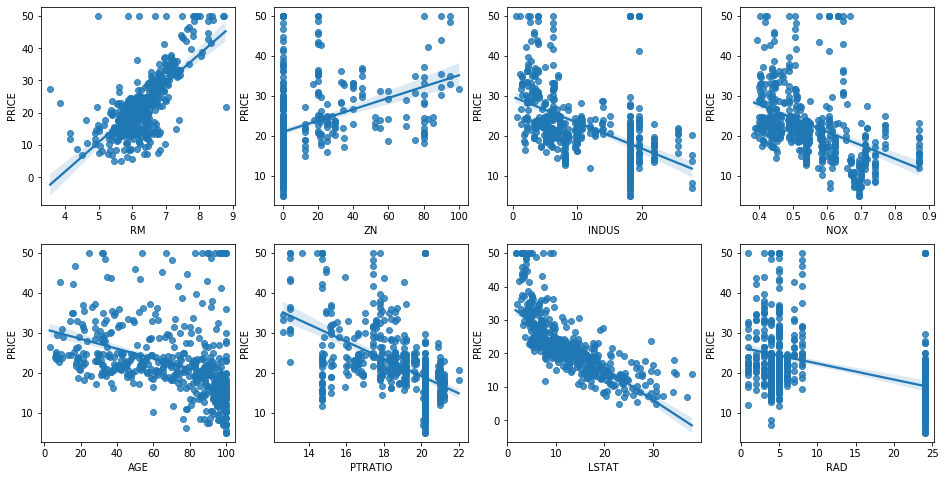

In [8]:
fig, axs = plt.subplots(figsize = (16, 8) , ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS','NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [9]:
X = boston_df['RM']
Y = boston.target

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2019)

In [11]:

sim_lr = LinearRegression()

In [12]:
sim_lr.fit(x_train.values.reshape(-1, 1), y_train)
# pred = sim_lr.predict(x_test)
# accuracy = accuracy_score(y_tesy, pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = sim_lr.predict(x_test.values.reshape(-1, 1))

In [14]:
r2_score(y_test, y_pred)

0.1795128921483402

In [15]:
sim_lr.coef_, sim_lr.intercept_

(array([9.99002801]), -40.094059576934114)

- 도출한 회귀식 : Price = 9.899 + RM - 40.09

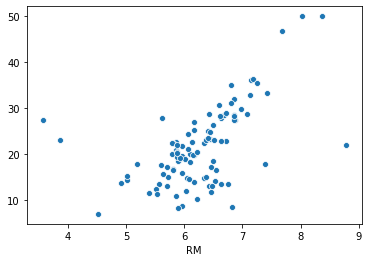

In [16]:
sns.scatterplot(x_test, y_test)
plt.show()

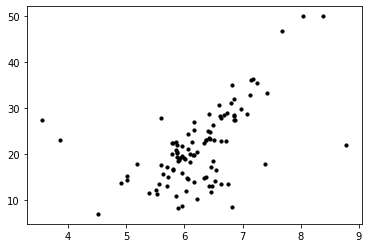

In [17]:
plt.scatter(x_test, y_test, s = 10, c='black')

In [18]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))

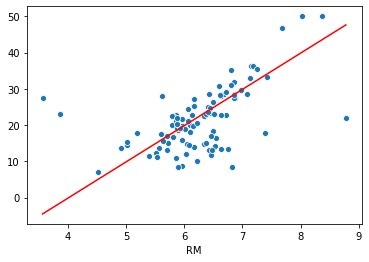

In [19]:
sns.scatterplot(x_test, y_test)
sns.lineplot(line_x, line_y, color='red')
plt.show()

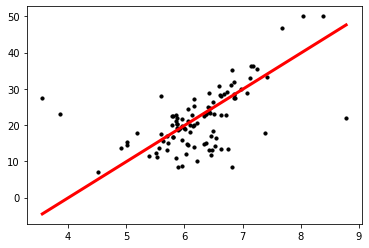

In [20]:
plt.scatter(x_test, y_test, s = 10, c='black')
plt.plot(line_x, line_y, c ='red', lw=3)
plt.show()

In [21]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4, 8])
ys = xs * w + b

In [22]:
xs = [4, 8]
y1 = xs[0] * w + b
y2 = xs[1] * w + b

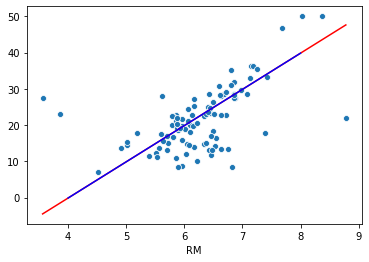

In [23]:
sns.scatterplot(x_test, y_test)
sns.lineplot(line_x, line_y, color='red')
sns.lineplot(xs, ys, color='blue')
plt.show()

## price vs lstat

In [68]:
X = boston_df['PRICE']
Y = boston_df['LSTAT']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

In [70]:
sim_lr = LinearRegression()
sim_lr.fit(x_train.values.reshape(-1,1), y_train)
price_preds = sim_lr.predict(x_test.values.reshape(-1,1))

In [71]:
r2_score(y_test, price_preds)

0.5137721019625436

In [72]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.61191726]), 26.3417822280161)

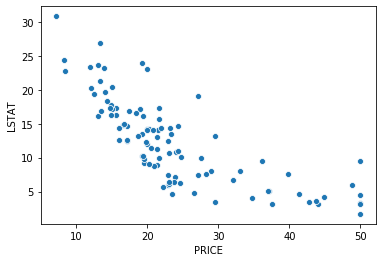

In [73]:
sns.scatterplot(x_test, y_test)
plt.show()

In [74]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))

In [75]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([10, 40])
ys = xs * w + b
xs = [10, 40]
y1 = xs[0] * w + b
y2 = xs[1] * w + b

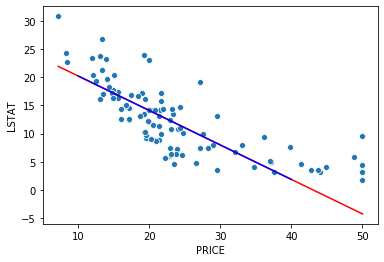

In [76]:
sns.scatterplot(x_test, y_test)
sns.lineplot(line_x, line_y, color='red')
sns.lineplot(xs, ys, color='blue')
plt.show()

In [141]:
def single_regression(x_train, x_test, y_train, y_test):
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1,1), y_train)
    y_preds = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

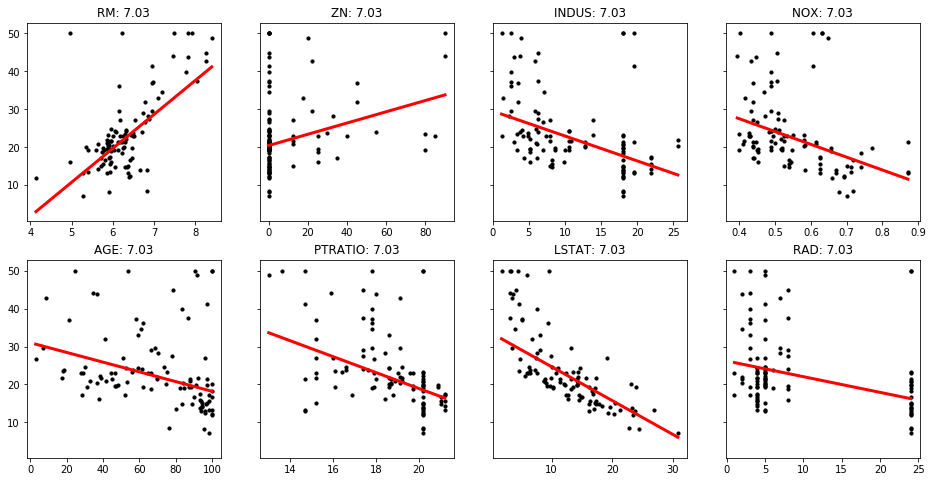

In [145]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2, sharey=True)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for index, feature in enumerate(lm_features):
    X = boston_df[feature]
    x_train, x_test, y_train, y_test = \
        train_test_split(X, boston.target, test_size=0.2, 
                         random_state=19)
    rmse, weight, bias = single_regression(x_train, x_test, y_train, y_test)

    row = index // 4
    col = index % 4
    ax = axs[row][col]
    ax.scatter(x_test, y_test, s=10, c='black')
    xline = np.array([np.min(x_test), np.max(x_test)])
    yline = weight * xline + bias
    ax.plot(xline, yline, c='red', lw=3)
    ax.set_title(feature+': '+str(rmse))
plt.show()

## Decision Tree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dtr = DecisionTreeRegressor()

In [123]:
x = boston_df['LSTAT']

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, boston.target, test_size = 0.2, random_state=2019)

In [125]:
dtr.fit(x_train.values.reshape(-1, 1), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [126]:
y_pred = dtr.predict(x_test.values.reshape(-1, 1))

In [127]:
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
rmse

7.06

In [128]:
r2_score(y_test, y_pred)

0.5232947418845166

In [129]:
# Support Vector Machin Regressor

In [131]:
from sklearn.svm import SVR
svm_regr = SVR()

In [138]:
x = boston_df['LSTAT']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, boston.target, test_size = 0.2, random_state=2019)

In [134]:
svm_regr.fit(x_train.values.reshape(-1, 1), y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [135]:
y_pred = svm_regr.predict(x_test.values.reshape(-1, 1))

In [136]:
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
rmse

7.03

In [137]:
r2_score(y_test, y_pred)

0.5272593248530455